In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score


In [2]:
boston=datasets.load_boston()
boston['data']
#print(boston['DESCR'])
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [3]:
boston_df=pd.DataFrame(boston['data'],columns=boston['feature_names'])
boston_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [4]:
boston['target']
boston_df['real price']=boston['target']
boston_df


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,real price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


LINEAR REGRESSION MODEL

In [9]:
li_re=LinearRegression()
# SPLIT DATASETS TO TRAINING AND TEST SET


y=boston_df['real price']
x=boston_df.iloc[:,:13]
test_size=0.25
seed=5
x_train,x_validation,y_train,y_validation=sklearn.model_selection.train_test_split(x,y,test_size=test_size,random_state=seed
                                                                                  )
li_re.fit(x_train,y_train)

li_re_train=li_re.predict(x_train)
li_re_validation=li_re.predict(x_validation)

# CALCULATE INTERCEPT AND COEFFICIENT
print(li_re.intercept_)
coef_series=pd.Series(li_re.coef_,index=boston['feature_names'])
print(coef_series)

32.21412038974359
CRIM       -0.153005
ZN          0.047939
INDUS      -0.008601
CHAS        2.579867
NOX       -14.632565
RM          3.962834
AGE        -0.007924
DIS        -1.460780
RAD         0.345431
TAX        -0.012450
PTRATIO    -0.919093
B           0.013220
LSTAT      -0.517255
dtype: float64


NOX VS ACTUAL PRICE

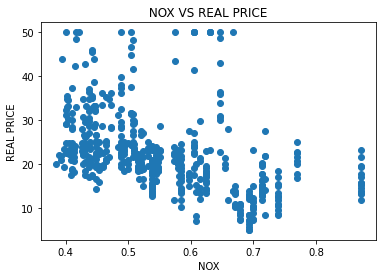

In [9]:
plt.scatter(boston_df['NOX'],boston_df['real price'])
plt.xlabel('NOX')
plt.ylabel('REAL PRICE')
plt.title(" NOX VS REAL PRICE ")
plt.show()


RM VS ACTUAL PRICE


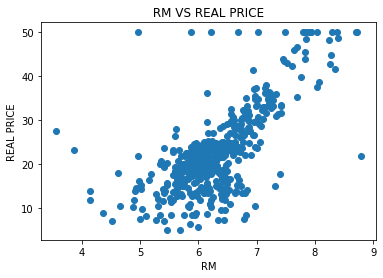

In [10]:
plt.scatter(boston_df['RM'],boston_df['real price'])
plt.xlabel('RM')
plt.ylabel('REAL PRICE')
plt.title(" RM VS REAL PRICE ")
plt.show()


CALCULATE MEAN SQUARED ERROR ( MSE )

In [18]:
print('train= ', np.mean((y_train-li_re_train)**2))

train=  21.514174022233707


In [21]:
print('validation=', np.mean((y_validation-li_re_validation)**2))
#print(np.sum((y_validation-li_re_validation)))

validation= 24.27460831168793
60.08855911408634
